# Problem 1
<p>
    In this problem we will use synthetic data sets to explore the bias-variance tradeoff
    incurred by using regularization.
</p>
<ul>
  <li> 
      <p>
           Generate data of the form:
           $ y = X\beta+ \epsilon $</p>
      <p>
          where X is an n x p matrix where n = 51, p = 50, and each $ X_{ij}  N(0, 1) $ Also, generate
          the noise according to $\epsilon \sim N(0,  1/4)$ Let $\beta$ be the all ones vector (for simplicity).
          By repeatedly doing this experiment and generating fresh data (fresh X, and y, and hence $\hat{\beta}$ {
          but make that you're not reseting your random seed!) but keeping  , you will estimate
          many different solutions, $\hat{\beta}$. Estimate the mean and variance of $\hat{\beta}$. Note that $\hat{\beta}$ is a vector, so for this exercise simply estimate the variance of a single component.
     </p>
  </li>
</ul>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv

InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

## Part 1 Sampling

In [2]:
def createData():
    X = np.random.randn(51,50)
    beta = np.ones((50,1))
    epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
    y = np.matmul(X, beta) + epsilon
    psuedo_inv = np.linalg.inv(np.matmul(X.T, X))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X.T), epsilon) + beta
    return X, y, beta_hat, beta

In [3]:
def sampleData(n = 100):
    samples = []
    for i in range(n):
        X, y, beta_hat, beta = createData()
        samples.append(beta_hat[0])
    samples = np.array(samples)
    return samples

Mean of the sampling distribution is: 1.0168272913133343
Variance of the sampling distribution is: 0.10748558345167089


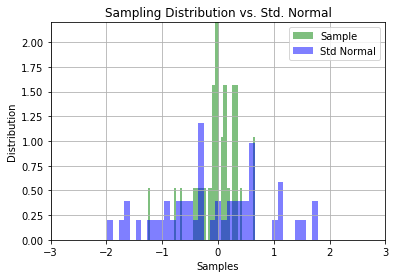

In [4]:
num_samples = 50
samples = sampleData(num_samples)
print("Mean of the sampling distribution is: {}".format(np.mean(samples)))
print("Variance of the sampling distribution is: {}".format(np.var(samples)))
num_bins = 50
_ = plt.hist(samples - np.mean(samples), num_bins, normed=1, facecolor='green', alpha = 0.5, label='Sample')
_ = plt.hist(np.random.randn(num_samples), num_bins, normed=1, facecolor='blue', alpha=0.5, label='Std Normal')
_ = plt.xlabel('Samples')
_ = plt.ylabel('Distribution')
_ = plt.title('Sampling Distribution vs. Std. Normal')
_ = plt.xlim([-3, 3])
_ = plt.ylim([0, 2.2])
_ = plt.legend()
_ = plt.grid(True)

Remark- note that sampling distribution was zero-meaned and normed.

## Part 2 Ridge Regression

In [5]:
# Sample a distribution and return the mean and var of the sample
def getSampleParams(n=100):
    beta_hats = []
    for i in range(n):
        X = np.random.randn(51,50)
        beta = np.ones((50,1))
        epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
        y = np.matmul(X, beta) + epsilon
        model = Ridge(alpha=alpha)
        _ = model.fit(X,y)
        beta_hats.extend(model.coef_)
    
    beta_hats = np.array(beta_hats)
    # Beta hat shape is (100,50)
    mean = np.mean(beta_hats[:,0])
    var = np.var(beta_hats[:,0])
    return mean, var

In [6]:
# Get coefficients as lambda varies
alphas = [0.01, 0.1, 1, 10, 100]
means = []
variances = []
for alpha in alphas:
    mean, var = getSampleParams()
    means.append(mean)
    variances.append(var)
    

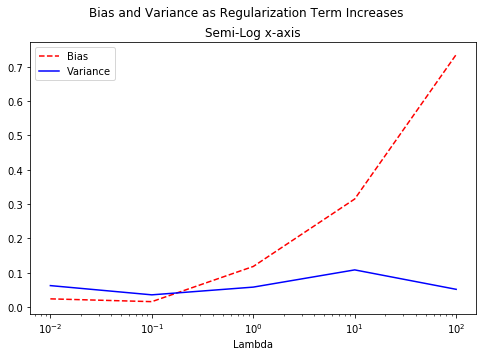

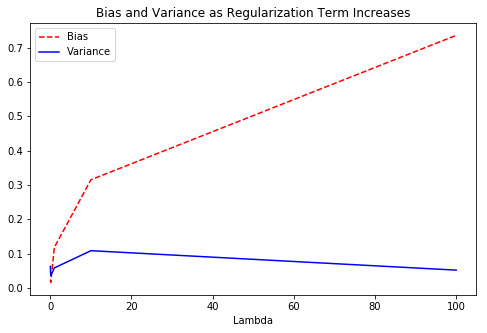

In [7]:
# Plot the results
bias = np.ones(5) - means
fig = plt.figure(figsize=(8,5))
_ = plt.semilogx(alphas, bias, color='red', linestyle='--', label='Bias')
_ = plt.semilogx(alphas, variances, color='blue', label='Variance')
_ = plt.xlabel('Lambda')
_ = plt.suptitle('Bias and Variance as Regularization Term Increases')
_ = plt.title('Semi-Log x-axis')
_ = plt.legend()

fig = plt.figure(figsize=(8,5))
_ = plt.plot(alphas, bias, color='red', linestyle='--', label='Bias')
_ = plt.plot(alphas, variances, color='blue', label='Variance')
_ = plt.xlabel('Lambda')
_ = plt.title('Bias and Variance as Regularization Term Increases')
_ = plt.legend()

Use ridge regression, i.e., L2 regularization. Vary the regularization coeffcient $\lambda = 0.01, 0.1, 1, 10, 100$ and repeat the above experiment. What do you observe? As you increase $\lambda $ is the model becoming more simple or more complex? As you increase $\lambda $ is performance becoming better or worse? Also compute LOOCV for each $\lambda $. How does the value of LOOCV, and in particular how it changes as $\lambda $ varies, compare with what you observe for the explicitly computed variance?

In [8]:
def scoreRidge(X_train, X_test, y_train, y_test, alpha):
    model = Ridge(alpha=alpha)
    _ = model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    score = mean_squared_error(y_test, y_hat)
    return score

In [9]:
# Create some data and perform LOOCV
X, y, beta_hat, beta = createData()
loo = LeaveOneOut()
num_splits = loo.get_n_splits(X)

alphas = [0.01, 0.1, 1, 10, 100]
scores = []
for alpha in alphas:
    score = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        score += float(scoreRidge(X_train, X_test, y_train, y_test, alpha))
    scores.append(score/num_splits)
scores = np.array(scores)

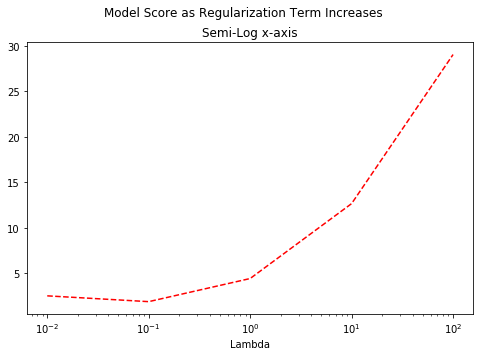

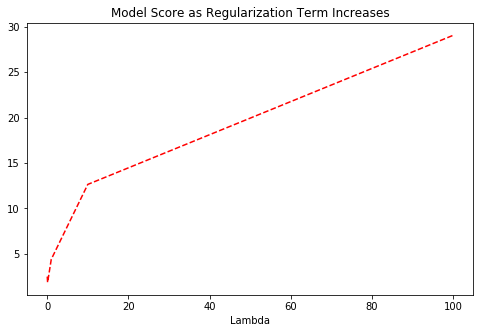

In [10]:
# Plot the results
bias = np.ones(5) - means
fig = plt.figure(figsize=(8,5))
_ = plt.semilogx(alphas, scores, color='red', linestyle='--')
_ = plt.xlabel('Lambda')
_ = plt.suptitle('Model Score as Regularization Term Increases')
_ = plt.title('Semi-Log x-axis')

fig = plt.figure(figsize=(8,5))
_ = plt.plot(alphas, scores, color='red', linestyle='--')
_ = plt.xlabel('Lambda')
_ = plt.title('Model Score as Regularization Term Increases')

Read about the Bootstrap, and try to use it to compute the variance (as above), but with a single copy of the data, rather than with many fresh copies of the data.

In [11]:
# Sample from data
def grabDataPoint(X,y):
    np.random.seed(42)
    random_index = np.random.randint(0, 50+1)
    #print(X[random_index, :], y[random_index])
    return X[random_index, :], y[random_index]

def buildNewX(X,y):
    X_new = np.zeros((51,50), dtype=float)
    y_new = np.zeros((51,), dtype=float)
    #np.random.seed(42)
    for i in range(50):
        random_index = np.random.randint(0, 50+1)
        data_point = X[random_index, :]
        label = y[random_index]
        X_new[i, :] = data_point
        y_new[i] = label
    #print(X_new)
    #print(np.linalg.matrix_rank(X_new))
    #print(np.linalg.cond(X_new))
    #print(np.linalg.cond(np.matmul(X_new.T, X)))
    return X_new, y_new

def getBetaHat(X_new, y_new):
    psuedo_inv = inv(np.matmul(X_new.T, X_new))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X_new.T), y_new)
    return beta_hat

def sampleDataBootstrap(X, y, n = 100):
    samples = []
    for i in range(n):
        X_new, y_new = buildNewX(X, y)
        beta_hat = getBetaHat(X_new, y_new)
        samples.append(beta_hat[0])
    samples = np.array(samples)
    return samples

Mean of the sampling distribution is: 70.8270113903088
Variance of the sampling distribution is: 1652602.6969369466


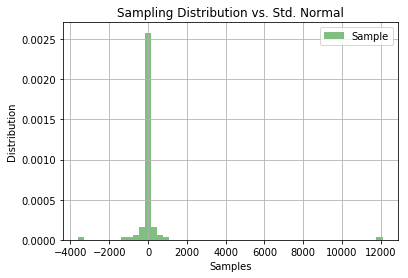

In [12]:
# Create some data and sample from it
X, y, beta_hat, beta = createData()
#print(np.linalg.matrix_rank(X))
samples = np.array(samples)
samples = sampleDataBootstrap(X, y)

print("Mean of the sampling distribution is: {}".format(np.mean(samples)))
print("Variance of the sampling distribution is: {}".format(np.var(samples)))
num_bins = 50
_ = plt.hist(samples, num_bins, normed=1, facecolor='green', alpha = 0.5, label='Sample')
#_ = plt.hist(np.random.randn(100), num_bins, normed=1, facecolor='blue', alpha=0.5, label='Std Normal')
_ = plt.xlabel('Samples')
_ = plt.ylabel('Distribution')
_ = plt.title('Sampling Distribution vs. Std. Normal')
#_ = plt.xlim([-3, 3])
#_ = plt.ylim([0, 2.2])
_ = plt.legend()
_ = plt.grid(True)

I spent several hours debugging this bootstrapping method and trying new ones, and could not get it to work for the problem constraints. The bootstrapped matrix is ill conditioned and not full rank. I tried many different methods to fix this issue and could not resolve it. Suggestions are welcome.

# Problem 2

## Problem 9 chapter 6 : 
In this exercise, we will predict the number of applications received
using the other variables in the College data set.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Loading the dataset
filepath = '../../datasets/ISLR/data/csv/'
filename = 'College.csv'
college_df = pd.read_csv(filepath+filename)

# Binarizing the label private and dropping unnamed columns
college_df['Private'].replace(['Yes','No'],[1,0],inplace = True)
college_df = college_df.loc[:, ~college_df.columns.str.contains('^Unnamed')]


## Part A 
Split the data set into a training set and a test set.

In [3]:
# Splits the data to predict number of apps
y_college = college_df['Apps']
X_college = college_df.drop(['Apps'],axis = 1)

X_college_train, X_college_test, y_college_train, y_college_test = train_test_split(X_college, y_college, shuffle = True, test_size =0.2)


## Part B
Fit a linear model using least squares on the training set, and
report the test error obtained.

In [4]:
# Fits a linear regression model and calculates mean squared error between predictions and actual using sklearn function
# Also computes the score of the model
lin_regr = LinearRegression()
lin_regr.fit(X_college_train,y_college_train)
y_pred = lin_regr.predict(X_college_test)

print("Score of the Linear Regression model using least squares  is {}".format(lin_regr.score(X_college_test, y_college_test)))
print('Mean Squared error of the Linear Regression model using least squares is {}'.format(mean_squared_error(y_college_test, y_pred)))

Score of the Linear Regression model using least squares  is 0.9170055401331696
Mean Squared error of the Linear Regression model using least squares is 970702.4274009081


## Part C
Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.

In [5]:
# Setting up alphas to be tested
alphas = np.arange(0.001,10,.01)

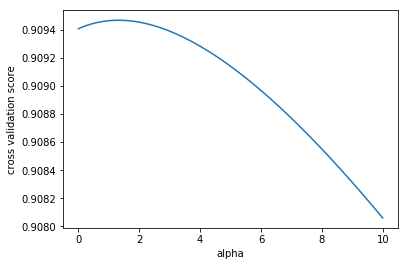

In [6]:
# Scaling the X_train to std and running cross validation score to get best alpha for ridge
scaler = StandardScaler()
X_college_train_std = scaler.fit_transform(X_college_train)
X_college_test_std = scaler.fit_transform(X_college_test)

scores = [cross_val_score(Ridge(alpha), X_college_train_std, y_college_train, cv=5).mean()
            for alpha in alphas]
plt.plot(alphas, scores, label = 'ridge')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()


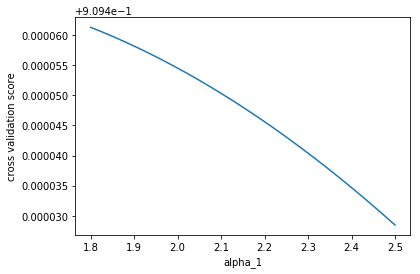

In [7]:
# Zooming in on the alphas
alphas_1 = np.arange(1.80,2.50,0.0001)
scores_1 = [cross_val_score(Ridge(alpha), X_college_train_std, y_college_train, cv=5).mean()
            for alpha in alphas_1]
plt.plot(alphas_1, scores_1, label = 'ridge')
plt.xlabel('alpha_1')
plt.ylabel('cross validation score')
plt.show()


In [8]:
# Cross validation tells us that our best alpha is around 2.25
# Fitting a model with obtained alpha and calculating MSE and test Score

reg_ridge = Ridge(alpha = 2.25)
reg_ridge.fit(X_college_train_std,y_college_train)
y_pred_1 = reg_ridge.predict(X_college_test_std)


print("Score of the Ridge regression model is {}".format(reg_ridge.score(X_college_test_std, y_college_test)))
print('Mean Squared error of the Ridge regression model is {}'.format(mean_squared_error(y_college_test, y_pred_1)))



Score of the Ridge regression model is 0.8844190160321217
Mean Squared error of the Ridge regression model is 1351834.10891556


## Part D
Fit a lasso model on the training set, with λ chosen by cross-
validation. Report the test error obtained, along with the num-
ber of non-zero coefficient estimates.

In [9]:
# Generating alphas to be tested for Lasso
alphas_2 = np.arange(1,30, 0.01)

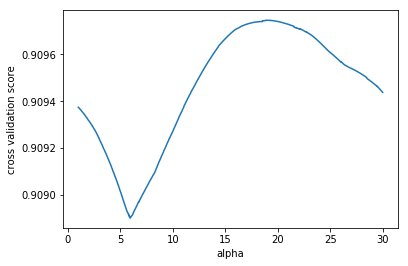

In [10]:
# Scaling the X_train to std and running cross validation score to get best alpha for lasso
scaler = StandardScaler()
X_college_train_std_1 = scaler.fit_transform(X_college_train)
X_college_test_std_1 = scaler.fit_transform(X_college_test)

scores_2 = [cross_val_score(Lasso(alpha), X_college_train_std_1, y_college_train, cv=5).mean()
            for alpha in alphas_2]
plt.plot(alphas_2, scores_2, label = 'Lasso')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()

In [11]:
# Cross validation tells us that our best alpha is around 22.5
reg_lasso = Lasso(alpha = 22.5)
reg_lasso.fit(X_college_train_std_1,y_college_train)
y_pred_2 = reg_lasso.predict(X_college_test_std_1)


print("Score of the Lasso regression model is {}".format(reg_lasso.score(X_college_test_std_1, y_college_test)))
print('Mean Squared error of the Lasso regression model is {}'.format(mean_squared_error(y_college_test, y_pred_2)))

Score of the Lasso regression model is 0.8863286564950928
Mean Squared error of the Lasso regression model is 1329498.9718974573


## Part E
Fit a PCR model on the training set, with M chosen by cross-
validation. Report the test error obtained, along with the value
of M selected by cross-validation.

In [12]:
# Making another copies of the x and y from original data frame
scaler = StandardScaler()
y = college_df['Apps']
X = college_df.drop(['Apps'],axis = 1)
X = scaler.fit_transform(X)

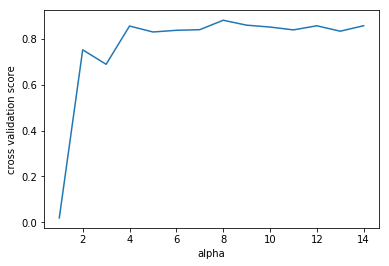

In [13]:
# The function below checks for cross validation score of dimensionality reduction parameter k
alphas_3 = np.arange(1,15,1)
def pca_calc(k): 
    pca = PCA(n_components = k)
    X_transformed = pca.fit_transform(X)
   # print(pca.explained_variance_ratio_)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, shuffle = True, test_size = 0.2)
    return cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean()

# Check PCA scores and plot them against alpha

scores_3 = [pca_calc(alpha) for alpha in alphas_3]

plt.plot(alphas_3, scores_3, label = 'PCA')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.show()
    

In [14]:
# We can see that M = 4 gives us the best cross validation score
# The code below calculates MSE and Score at the given M
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,shuffle = True, test_size = 0.2)
lin_pca = LinearRegression()
lin_pca.fit(X_train,y_train)
y_pred_pca = lin_pca.predict(X_test)
print("Score of the PCA regression model is {}".format(lin_pca.score(X_test, y_test)))
print('Mean Squared error of the PCA regression model is {}'.format(mean_squared_error(y_pred_pca, y_test)))

Score of the PCA regression model is 0.859826383379443
Mean Squared error of the PCA regression model is 1343409.3955856145


## Part F
Fit a PLS model on the training set, with M chosen by cross-
validation. Report the test error obtained, along with the value
of M selected by cross-validation.

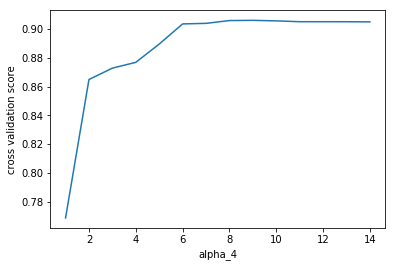

In [16]:
## The code below calculates the PLSRegression cross validation score with compo
alphas_4 = np.arange(1,15,1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,shuffle = True, test_size = 0.2)
scores_4 = [cross_val_score(PLSRegression(n_components = alpha), X_train_1, y_train_1, cv=5).mean()
            for alpha in alphas_4]
plt.plot(alphas_4, scores_4, label = 'PLS')
plt.xlabel('alpha_4')
plt.ylabel('cross validation score')
plt.show()

In [17]:
# We can see that m = 2 gives us the best cross validation score with least number of directions
# We will predict that score here
reg_pls = PLSRegression(n_components = 2)

reg_pls.fit(X_train_1,y_train_1)
y_pred_pls = reg_pls.predict(X_test_1)

print("Score of the PLS regression model is {}".format(reg_pls.score(X_test_1,y_test_1)))

print('Mean Squared error of the PLS regression model is {}'.format(mean_squared_error(y_pred_pls,y_test_1)))

Score of the PLS regression model is 0.913016693877444
Mean Squared error of the PLS regression model is 1190007.8139238353


## Part G
Comment on the results obtained. How accurately can we pre-
dict the number of college applications received? Is there much
difference among the test errors resulting from these five ap-
proaches?

The dimensionality reduction techniques offered lower test scores indicating that data is correlated. We can predict the number of applications recieved using one of the least squares regression model. In our case, Regular Least squares model gave the highest test score. Lasso and Ridge regression also gave very low test error but slightly lesser than linear Regressions

# Problem 3
## Problem 11 Chapter 6

We will now try to predict per capita crime rate in the Boston data
set.<br>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import itertools
import time
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

/mnt/c/programming/ee379k/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def plotMSE(alphas, scores):
    fig = plt.figure()
    _ = plt.semilogx(alphas, scores)
    _ = plt.title(r'MSE as $\alpha$ increases')
    _ = plt.xlabel(r'$\alpha$')
    _ = plt.ylabel('MSE')
    
def plotR(alphas, scores):
    fig = plt.figure()
    _ = plt.semilogx(alphas, scores)
    _ = plt.title(r'R values as $\alpha$ increases')
    _ = plt.xlabel(r'$\alpha$')
    _ = plt.ylabel('R')

In [3]:
# Load the data
filepath = '../../datasets/ISLR/data/csv/'
filename = 'Boston.csv'
df = pd.read_csv(filepath + filename)

In [4]:
# Get a numpy array and scale the data
values = df.values
#scaled_data = values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(values)

In [5]:
#print(df.columns)
#df.isnull().sum()
#print(scaled_data.shape)
X = scaled_data[:,1:]
y = scaled_data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Part A
Try out some of the regression methods explored in this chapter,
such as best subset selection, the lasso, ridge regression, and
PCR. Present and discuss results for the approaches that you
consider.

In [6]:
# Keep track of the different model scores
scores = {}
r_vals = {}

#### $L^1$ Regularization (Lasso)

In [7]:
# Train using gridsearch cv
#alphas = np.logspace(-3, 0.5, num=10)
#parameters = {'alpha':alphas}
#lasso = Lasso()

#model = GridSearchCV(lasso, parameters, cv=5, return_train_score=True)
#_ = model.fit(X_train, y_train)
#y_hat = model.predict(X_test)
#score = mean_squared_error(y_test, y_hat)

In [8]:
# Tune by hand
alphas = np.logspace(-4, 0, num=10)
lasso_scores = []
lasso_rvalues = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.0001)
    _ = lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    r_val = lasso.score(X_test, y_test)
    lasso_rvalues.append(r_val)
    lasso_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
0.0001


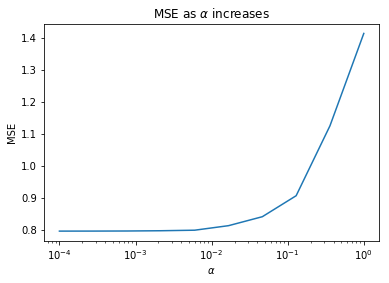

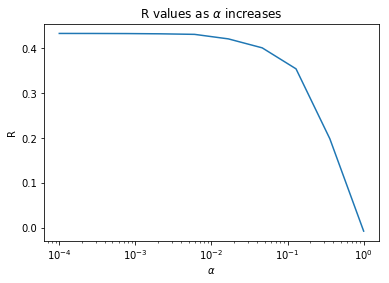

In [9]:
plotMSE(alphas, lasso_scores)
plotR(alphas, lasso_rvalues)

best_alpha = alphas[np.argmin(np.array(lasso_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
scores['Lasso'] = np.amin(np.array(lasso_rvalues))
scores['Lasso'] = np.amin(lasso_scores)

In [10]:
# I want to see the weights chosen by Lasso
lasso = Lasso(alpha=best_alpha, tol=0.0001)
_ = lasso.fit(X_train, y_train)

keys = df.columns.values.tolist()
_ = keys.pop(0)
values = lasso.coef_
weights = dict(zip(keys, values))
for k, v in weights.items():
    print('{}:   {}'.format(k, v))

dis:   -0.25287289888024134
black:   -0.06610260511725459
medv:   -0.20182355439791752
age:   -0.024959779136971706
rad:   0.5316674900891365
indus:   -0.04220127663768874
chas:   -0.021840596093592676
nox:   -0.14838611538433963
rm:   0.054007379700657304
lstat:   0.11515104909721083
ptratio:   -0.07031834952241904
tax:   -0.023929884428059076
zn:   0.10087158133311624


#### $L^1$ Regularization (w/Feature Engineering)

In [11]:
# Try dropping zero columns and adding polynomial versions of non-zero columns
df_copy = df.copy()
#drops = list(weights.keys()[weights.values() == 0])
keeps = []
for item in weights.items():
    if abs(item[1]) >= 0.08:
        #print(item[1])
        keeps.append(item)

keeps = [x[0] for x in keeps]
df_copy = df_copy[keeps]

# Get a numpy array and scale the data
values_copy = df_copy.values
#scaled_data_copy = values_copy
scaler_copy = StandardScaler()
scaled_data_copy = scaler_copy.fit_transform(values_copy)

# Make PolynomialFeatures object
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(scaled_data_copy)

X_train, X_test, y_train, y_test = train_test_split(poly_data, scaled_data[:,0])

In [12]:
print(df_copy.columns)

Index(['dis', 'medv', 'rad', 'nox', 'lstat', 'zn'], dtype='object')


In [13]:
# Tune by hand
alphas = np.logspace(-4, -0.2, num=10)
lasso_scores = []
lasso_rvalues = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.0001)
    _ = lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    r_val = lasso.score(X_test, y_test)
    lasso_rvalues.append(r_val)
    lasso_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
0.0018478497974222907


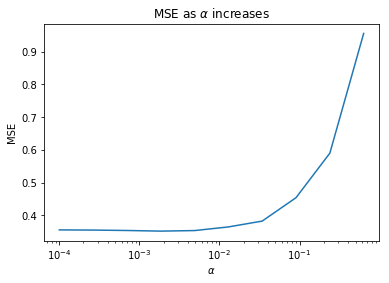

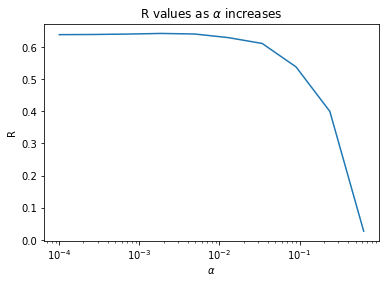

In [14]:
plotMSE(alphas, lasso_scores)
plotR(alphas, lasso_rvalues)

best_alpha = alphas[np.argmin(np.array(lasso_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Lasso-Poly'] = np.amin(np.array(lasso_rvalues))
scores['Lasso-Poly'] = np.amin(lasso_scores)

#### $L^2$ Regularization with columns chosen by $L^1$

We grab the non-zeroed columns from Lasso and perform Ridge on them.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data_copy, scaled_data[:,0])

In [16]:
# Tune by hand
alphas = np.logspace(1, 3, num=10)
lasso_ridge_scores = []
lasso_ridge_rvalues = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, tol=0.0001)
    _ = ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    r_val = ridge.score(X_test, y_test)
    lasso_ridge_rvalues.append(r_val)
    lasso_ridge_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
77.4263682681127


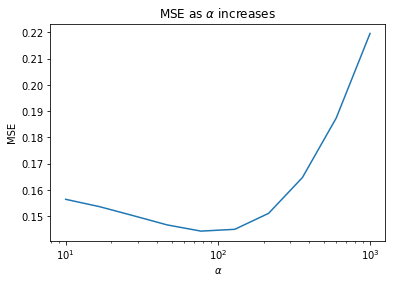

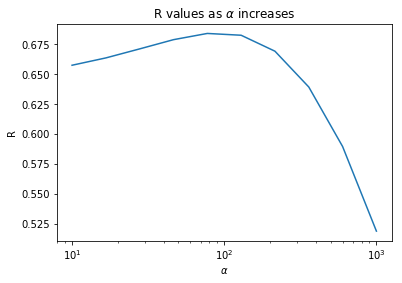

In [17]:
plotMSE(alphas, lasso_ridge_scores)
plotR(alphas, lasso_ridge_rvalues)

best_alpha = alphas[np.argmin(np.array(lasso_ridge_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Lasso-Ridge-Combo'] = np.amin(np.array(lasso_ridge_rvalues))
scores['Lasso-Ridge-Combo'] = np.amin(lasso_ridge_scores)

#### $L^2$ Regularization (Ridge)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data[:,1:], scaled_data[:,0])

In [19]:
#alphas = np.logspace(-3, 1, num=10)
#parameters = {'alpha':alphas}
#ridge = Ridge()
#model = GridSearchCV(ridge, parameters, cv=5, return_train_score=True)
#_ = model.fit(scaled_data[:,1:], scaled_data[:,0])
#y_hat = model.predict(X_test)
#score = mean_squared_error(y_test, y_hat)
#scores['Ridge'] = score
#print(score)

In [20]:
# Tune by hand
alphas = np.logspace(-1, 2, num=10)
ridge_scores = []
ridge_rvals = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, tol=0.0001)
    _ = ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    r_val = ridge.score(X_test, y_test)
    ridge_rvals.append(r_val)
    ridge_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
10.0


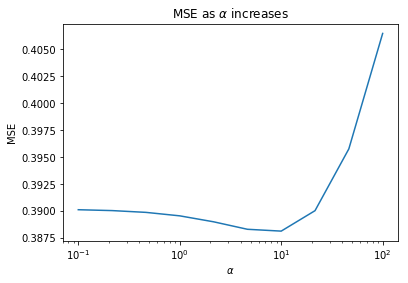

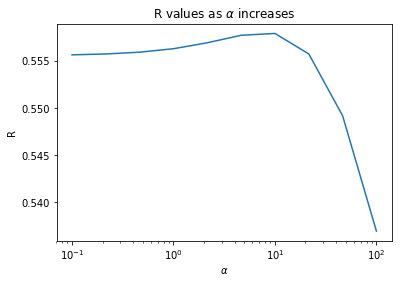

In [21]:
plotMSE(alphas, ridge_scores)
plotR(alphas, ridge_rvals)

best_alpha = alphas[np.argmin(np.array(ridge_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Ridge'] = np.amin(np.array(ridge_rvals))
scores['Ridge'] = np.amin(ridge_scores)

In [22]:
# I want to see the weights chosen by Ridge
keys = df.columns.values.tolist()
_ = keys.pop(0)
values = ridge.coef_
weights = dict(zip(keys, values))
for k, v in weights.items():
    print('{}:   {}'.format(k, v))

dis:   -0.09830997969096686
black:   -0.11568865097335537
medv:   -0.11578572226237556
age:   0.015767235674881405
rad:   0.2769159106442261
indus:   -0.015441334499667145
chas:   -0.0240362745139608
nox:   -0.0013004425126157987
rm:   0.045452046006826105
lstat:   0.0615603873217908
ptratio:   -0.000257183049804668
tax:   0.1359621668375128
zn:   0.05380061229747061


#### $L^2$ Regularization (w/Feature Engineering)

In [23]:
# Make new Ridge and fit again using polydata
X_train, X_test, y_train, y_test = train_test_split(poly_data, scaled_data[:,0])

# Tune by hand
alphas = np.logspace(-1.5, 2, num=10)
ridge_scores = []
ridge_rvalues = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, tol=0.0001)
    _ = ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    r_val = ridge.score(X_test, y_test)
    ridge_rvalues.append(r_val)
    ridge_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
0.03162277660168379


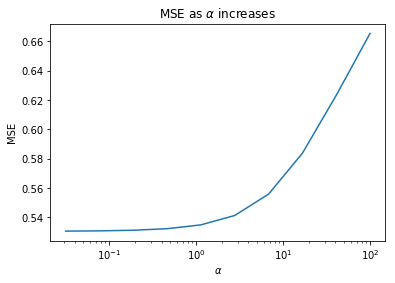

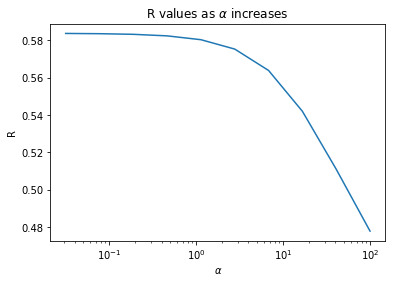

In [24]:
plotMSE(alphas, ridge_scores)
plotR(alphas, ridge_rvalues)

best_alpha = alphas[np.argmin(np.array(ridge_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Ridge-Poly'] = np.amin(np.array(ridge_rvals))
scores['Ridge-Poly'] = np.amin(ridge_scores)

In [25]:
print("MSE Scores:")
for k, v in scores.items():
    print('{}:   {}'.format(k, v))

print('')
print("R Values:")
for k, v in r_vals.items():
    print('{}:   {}'.format(k, v))

MSE Scores:
Lasso-Poly:   0.35171621257470087
Lasso:   0.7959900478325921
Lasso-Ridge-Combo:   0.14432203736853225
Ridge-Poly:   0.5304938472127648
Ridge:   0.388113171018647

R Values:
Lasso-Poly:   0.02745294423673006
Lasso-Ridge-Combo:   0.5188057750415238
Ridge-Poly:   0.5369587983922879
Ridge:   0.5369587983922879


#### Principal Components Regression

In [26]:
# Grab fresh data and perform PCA
X = scaled_data[:,1:]
y = scaled_data[:,0]
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y)

In [27]:
model = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10, tol=None)
_ = model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(pred, y_test)
print(mse)

0.3483576183724773


#### Best Subset Selection

In [28]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X)
    regr = model.fit()
    RSS = ((regr.predict(X - y) ** 2).sum())
    return {"model":regr, "RSS":RSS}

In [29]:
def getBest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.iloc[:, models['RSS'].idxmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [29]:
X = df.drop('crim', axis=1)
y = df.iloc[:, df.columns != 'crim']
models = pd.DataFrame(columns=['RSS', 'model'])
tic = time.time()

#for i in range(1,12):
#    models.loc[i] = getBest(i)
#    toc = time.time()
#    print("Total elapsed time:", (toc-tic), "seconds.")

### Part B
Propose a model (or set of models) that seem to perform well on
this data set, and justify your answer. Make sure that you are
evaluating model performance using validation set error, crossvalidation,
or some other reasonable alternative, as opposed to
using training error.

Repeated runs show that the MSE for different models and alphas fluctuates from approximately 0.2 to 1.5. On average, Lasso and PCR tend to perform better. The one that consistenly performed the best overall was running Lasso and then setting a threshold to drop columns based on Lasso coefficients, then running Ridge on the remaining columns. The lowest score was 0.103 with this method. The MSE used here is test error, not training error.

### Part C
Does your chosen model involve all of the features in the data
set? Why or why not?

Lasso and PCR both neglect specific features by design. Again, the MSE fluctuated wildly but Lasso consistently nearly zeroed out 4-7 columns, while PCR tended to work well with n_components between 2 and 6. The method with Lasso and Ridge also dropped features deemed not relevant.

# Problem 4
## Part a
We will find closed form solution for $\hat{\beta_{ls}}$ by minimizing the equation $ \|x\beta - y \|_2^2$ by taking its derivative/gradient 

<p> Using the definition of $L^2$ norm</p>
<p> $$ \|X\beta - y \|_2^2 =  (X\beta -y)^T (X\beta-y)$$</p>
<p> Using the properties of transpose of a matrix</p>
<p> $$ (X\beta -y)^T (X\beta-y) = (\beta^TX^T -Y^T)(X\beta-y)$$</p>
<p> $$(\beta^TX^T -y^T)(X\beta-y) = (\beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty)$$ </p>
<p> Taking derivative with respect to $B^T$ </p>
<p> $$(\beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty) = (2X^TX\beta -2X^Ty)$$</p>
<p> Setting it equal to zero and solving for $\beta$ </p>
<p> $$(2X^TX\beta -2X^Ty) = 0$$  </p>
<p> yields $$\hat{\beta_{ls}} = \frac{X^Ty}{X^TX}$$  </p>
<p> which is $$\hat{\beta_{ls}} =  (X^TX)^{-1}X^Ty$$</p>

#### Part b
We will find closed form solution for $\hat{\beta_{R}}$ by minimizing the equation $ \|x\beta - y \|_2^2 + \lambda \|\beta\|_2^2$ by taking its derivative/gradient

<body>
<p> Using the definition of $L^2$ norm</p>
<p> $$ \|X\beta - y \|_2^2 + \lambda \|\beta\|_2^2 =  (X\beta -y)^T (X\beta-y) + \lambda \beta^T\beta$$</p>
<p> Using the properties of transpose of a matrix</p>
<p> $$ (X\beta -y)^T (X\beta-y) + \lambda \beta^T\beta  = (\beta^TX^T -Y^T)(X\beta-y) + \lambda \beta^T\beta$$</p>
<p> $$(\beta^TX^T -y^T)(X\beta-y) + \lambda \beta^T\beta = (\beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty)+ \lambda \beta^T\beta$$ </p>
<p> Taking derivative with respect to $B^T$ </p>
<p> $$(\beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty)+ \lambda \beta^T\beta = (2X^TX\beta -2X^Ty)+ \lambda\beta$$</p>
<p> Setting it equal to zero and solving for $\beta$ </p>
<p> $$(2X^TX\beta -2X^Ty) + \lambda \beta = 0 $$ </p>
<p> $$\beta(2X^TX +\lambda I) =2X^Ty$$ </p>
<p> We can cancel out 2 because $\frac{\lambda}{2}$ is just another constant $\lambda$ </p>
<p> This yields $$\hat{\beta_{R}} = \frac{X^Ty}{X^TX + \lambda I}$$  </p>
<p> which is $$\hat{\beta_{R}} =  (X^TX+ \lambda I)^{-1}X^Ty$$</p>
</body>